In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

from nn.Activation import Tanh, Softmax
from nn.Module import Sequential, Linear
from nn.utils import plot_decision_boundary
from nn.Loss import CrossEntropy
from nn.Optimizer import Adam

In [2]:
seed = 42
X, y = make_circles(100, noise=0.03,random_state=seed)
np.random.seed(seed)

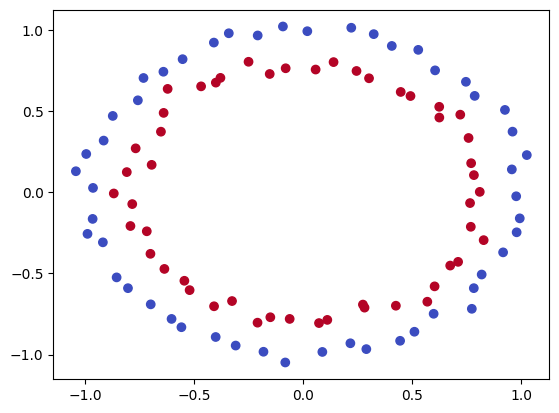

In [3]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.coolwarm);

In [4]:
model = Sequential(Linear(2, 5), Tanh(), Linear(5, 2), Softmax())

In [5]:
loss = CrossEntropy()
optimizer = Adam(lr=0.1)

In [6]:
epochs = 1000
for i in range(epochs):
    model.clear_gradients()
    output = model.forward(X)
    loss_value = loss.forward(output, y)
    grad = loss.backward(output, y)
    model.backward(grad)
    model.average_gradients(X.shape[0])
    optimizer.step(model)
    # print(f"Epochs:{i + 1}/{epochs} loss:{round(loss_value, 4)}")

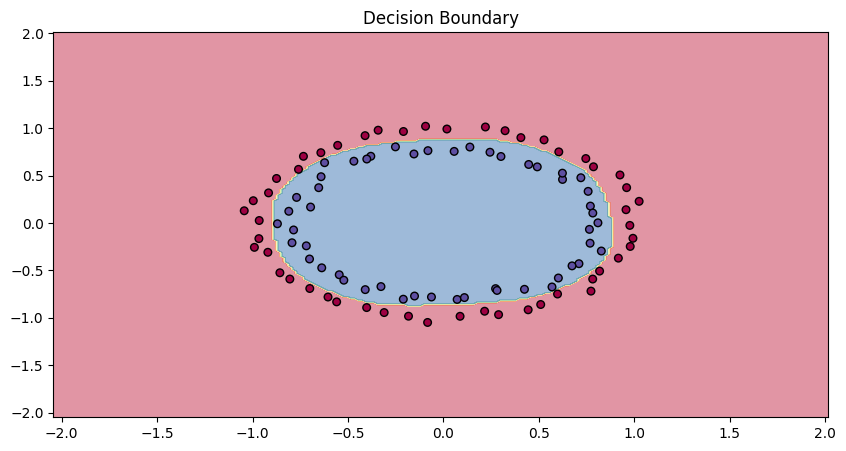

In [7]:
plot_decision_boundary(model, X, y)